In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv('../../documents/data/previous_data/5555_eventos-edit.csv', index_col=0)
df = df.drop('time', axis=1)

In [3]:
df

,event_0,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,...,event_5545,event_5546,event_5547,event_5548,event_5549,event_5550,event_5551,event_5552,event_5553,event_5554
0,56.0,56.0,56.0,53.0,55.0,55.0,54.0,54.0,54.0,54.0,...,54.0,54.0,53.0,53.0,51.0,51.0,51.0,51.0,51.0,51.0
1,55.0,55.0,55.0,53.0,55.0,55.0,54.0,54.0,54.0,54.0,...,52.0,52.0,52.0,52.0,52.0,51.0,51.0,51.0,51.0,51.0
2,53.0,53.0,53.0,51.0,53.0,53.0,55.0,55.0,55.0,55.0,...,53.0,53.0,53.0,53.0,50.0,55.0,55.0,55.0,55.0,55.0
3,53.0,53.0,53.0,52.0,53.0,53.0,54.0,54.0,54.0,54.0,...,53.0,53.0,53.0,53.0,50.0,55.0,55.0,55.0,55.0,55.0
4,54.0,54.0,54.0,53.0,55.0,55.0,55.0,55.0,55.0,55.0,...,51.0,51.0,53.0,53.0,52.0,54.0,54.0,54.0,54.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,53.0,53.0,53.0,54.0,55.0,55.0,22.0,22.0,22.0,22.0,...,54.0,54.0,50.0,50.0,50.0,52.0,52.0,52.0,52.0,52.0
2496,55.0,55.0,55.0,54.0,56.0,56.0,14.0,14.0,14.0,14.0,...,50.0,50.0,51.0,51.0,53.0,51.0,51.0,51.0,51.0,51.0
2497,52.0,52.0,52.0,53.0,53.0,53.0,37.0,37.0,37.0,37.0,...,53.0,53.0,51.0,51.0,53.0,52.0,52.0,52.0,52.0,52.0
2498,52.0,52.0,52.0,53.0,54.0,54.0,51.0,51.0,51.0,51.0,...,52.0,52.0,53.0,53.0,52.0,52.0,52.0,52.0,52.0,52.0


In [4]:
# sns.histplot(data=df.event_0)

In [5]:
# data_entries, bins_edges = np.histogram(df.event_0 , bins=10)
    
# dt = bins_edges[1] - bins_edges[0]
# centers = np.array([ bins_edges[i] + dt/2 for i in range(len(bins_edges)-1) ])

In [6]:
%%time
from data_analyze.FindPeaks.peaks import Find_Peaks_Waveforms
peaks = Find_Peaks_Waveforms(df).astype(dtype='int')
peaks

Wall time: 5.61 s


,peak_X0,peak_X1,peak_Y0,peak_Y1
event_0,94,1111,127,127
event_1,94,1111,127,127
event_2,94,1111,127,127
event_3,94,322,127,127
event_4,94,1815,127,32
...,...,...,...,...
event_5550,93,1736,4,127
event_5551,93,1736,4,127
event_5552,93,1736,4,127
event_5553,93,1736,4,127


In [7]:
peaks.iloc[0]

peak_X0      94
peak_X1    1111
peak_Y0     127
peak_Y1     127
Name: event_0, dtype: int32

In [8]:
%%time
from data_analyze.Spectrums.contour import contour_arbitrary_df
contours = contour_arbitrary_df(waveforms=df, peaks=peaks)



When trying to handle with the contour, a few events seem to have a problem with the contour going outside the waveform limit.
They are ['event_6', 'event_7', 'event_8', 'event_9', 'event_608', 'event_2509', 'event_5427']. 7 in total.
To solve, please check the arbitrary values for the pulse width.


Wall time: 10.7 s


In [9]:
contours[0]

,event_0,event_1,event_2,event_3,event_4,event_5,event_10,event_11,event_12,event_13,...,event_5545,event_5546,event_5547,event_5548,event_5549,event_5550,event_5551,event_5552,event_5553,event_5554
0,53.0,53.0,53.0,53.0,51.0,51.0,55.0,54.0,54.0,54.0,...,52.0,52.0,53.0,53.0,52.0,49.0,49.0,49.0,49.0,49.0
1,54.0,54.0,54.0,53.0,51.0,51.0,54.0,53.0,51.0,51.0,...,53.0,53.0,53.0,53.0,53.0,52.0,52.0,52.0,52.0,52.0
2,51.0,51.0,51.0,55.0,55.0,55.0,53.0,53.0,54.0,54.0,...,51.0,51.0,52.0,52.0,52.0,54.0,54.0,54.0,54.0,54.0
3,52.0,52.0,52.0,52.0,52.0,52.0,53.0,52.0,54.0,54.0,...,50.0,50.0,52.0,52.0,52.0,55.0,55.0,55.0,55.0,55.0
4,55.0,55.0,55.0,52.0,53.0,53.0,53.0,51.0,52.0,52.0,...,53.0,53.0,51.0,51.0,53.0,53.0,53.0,53.0,53.0,53.0
5,53.0,53.0,53.0,54.0,51.0,51.0,54.0,54.0,53.0,53.0,...,52.0,52.0,55.0,55.0,53.0,51.0,51.0,51.0,51.0,51.0
6,54.0,54.0,54.0,55.0,55.0,55.0,55.0,52.0,53.0,53.0,...,52.0,52.0,53.0,53.0,53.0,50.0,50.0,50.0,50.0,50.0
7,52.0,52.0,52.0,53.0,53.0,53.0,51.0,53.0,53.0,53.0,...,52.0,52.0,52.0,52.0,52.0,53.0,53.0,53.0,53.0,53.0
8,22.0,22.0,22.0,20.0,43.0,43.0,49.0,51.0,45.0,45.0,...,36.0,36.0,40.0,40.0,42.0,44.0,44.0,44.0,44.0,44.0
9,-95.0,-95.0,-95.0,-105.0,-59.0,-59.0,-21.0,-7.0,-20.0,-20.0,...,-127.0,-127.0,-47.0,-47.0,-43.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [10]:
contours[1]

,event_0,event_1,event_2,event_3,event_4,event_5,event_10,event_11,event_12,event_13,...,event_5545,event_5546,event_5547,event_5548,event_5549,event_5550,event_5551,event_5552,event_5553,event_5554
0,54.0,54.0,54.0,52.0,54.0,54.0,53.0,54.0,51.0,51.0,...,52.0,52.0,52.0,52.0,51.0,52.0,52.0,52.0,52.0,52.0
1,51.0,51.0,51.0,53.0,54.0,54.0,53.0,53.0,52.0,52.0,...,52.0,52.0,53.0,53.0,51.0,50.0,50.0,50.0,50.0,50.0
2,53.0,53.0,53.0,53.0,53.0,53.0,52.0,52.0,54.0,54.0,...,53.0,53.0,54.0,54.0,51.0,48.0,48.0,48.0,48.0,48.0
3,54.0,54.0,54.0,53.0,55.0,55.0,54.0,54.0,53.0,53.0,...,53.0,53.0,52.0,52.0,53.0,52.0,52.0,52.0,52.0,52.0
4,54.0,54.0,54.0,54.0,54.0,54.0,53.0,56.0,54.0,54.0,...,50.0,50.0,52.0,52.0,53.0,52.0,52.0,52.0,52.0,52.0
5,53.0,53.0,53.0,53.0,54.0,54.0,51.0,53.0,53.0,53.0,...,52.0,52.0,53.0,53.0,51.0,53.0,53.0,53.0,53.0,53.0
6,54.0,54.0,54.0,52.0,56.0,56.0,54.0,54.0,53.0,53.0,...,53.0,53.0,52.0,52.0,52.0,51.0,51.0,51.0,51.0,51.0
7,54.0,54.0,54.0,51.0,54.0,54.0,52.0,52.0,52.0,52.0,...,52.0,52.0,52.0,52.0,51.0,50.0,50.0,50.0,50.0,50.0
8,22.0,22.0,22.0,16.0,43.0,43.0,32.0,26.0,39.0,39.0,...,24.0,24.0,48.0,48.0,41.0,49.0,49.0,49.0,49.0,49.0
9,-98.0,-98.0,-98.0,-127.0,-3.0,-3.0,-116.0,-125.0,-23.0,-23.0,...,-127.0,-127.0,-2.0,-2.0,-31.0,-33.0,-33.0,-33.0,-33.0,-33.0


In [11]:
%%time
from data_analyze.Spectrums.integral import integral_rectangle_df, simpson_integral_df, trapeziod_integral_df
integrals_0 = simpson_integral_df(waveforms=contours[0])
integrals_1 = simpson_integral_df(waveforms=contours[1])

Wall time: 977 ms


In [12]:
integrals = pd.concat([integrals_0, integrals_1], axis=1)
integrals.columns = ['integrals_0', 'integrals_1']
integrals

,integrals_0,integrals_1
event_0,668.000000,701.333333
event_1,668.000000,701.333333
event_2,668.000000,701.333333
event_3,619.000000,453.000000
event_4,567.333333,1031.000000
...,...,...
event_5550,1094.000000,438.666667
event_5551,1094.000000,438.666667
event_5552,1094.000000,438.666667
event_5553,1094.000000,438.666667


In [13]:
df_filtered = df[ integrals.index ]
results = pd.concat( [peaks.loc[integrals.index], integrals] , axis=1 )
results

,peak_X0,peak_X1,peak_Y0,peak_Y1,integrals_0,integrals_1
event_0,94,1111,127,127,668.000000,701.333333
event_1,94,1111,127,127,668.000000,701.333333
event_2,94,1111,127,127,668.000000,701.333333
event_3,94,322,127,127,619.000000,453.000000
event_4,94,1815,127,32,567.333333,1031.000000
...,...,...,...,...,...,...
event_5550,93,1736,4,127,1094.000000,438.666667
event_5551,93,1736,4,127,1094.000000,438.666667
event_5552,93,1736,4,127,1094.000000,438.666667
event_5553,93,1736,4,127,1094.000000,438.666667


In [14]:
peaks[ peaks.columns[2] ].value_counts().sort_index(ascending=False)

127    3788
126      18
125      12
124      25
123       8
       ... 
5         7
4        13
3         4
2         1
1         1
Name: peak_Y0, Length: 127, dtype: int64

In [15]:
peaks[ peaks.columns[3] ].value_counts().sort_index(ascending=False)

127    2107
126      19
125      21
124      11
123      22
       ... 
4        43
3        60
2        37
1        31
0        42
Name: peak_Y1, Length: 128, dtype: int64

In [63]:
results_filt = results.query("integrals_0 < integrals_1")

In [71]:
results_filt_2 = results_filt.query("peak_Y0 < 127 and peak_Y1 < 127")
results_filt_2

,peak_X0,peak_X1,peak_Y0,peak_Y1,integrals_0,integrals_1
event_12,94,244,108,57,731.000000,915.0
event_13,94,244,108,57,731.000000,915.0
event_19,94,336,87,24,810.333333,1026.0
event_30,94,1826,45,42,956.000000,984.0
event_31,94,1826,45,42,956.000000,984.0
...,...,...,...,...,...,...
event_5517,94,1324,95,79,722.000000,846.0
event_5525,94,166,84,27,805.333333,1020.0
event_5526,94,166,84,27,805.333333,1020.0
event_5542,94,421,72,39,864.333333,978.0


In [86]:
def plots_collection(results):

    print(f"{results.shape[0]} events")

    ax1 = sns.histplot(results[['peak_Y0','peak_Y1']])
    plt.show()

    ax2 = sns.histplot(results[['integrals_0', 'integrals_1']])
    plt.show()

    ax3 = plt.scatter( x=results['integrals_0'], y=results['peak_Y0'], label='pulse_0' )
    plt.legend()
    plt.show()

    ax4 = plt.scatter( x=results['integrals_1'], y=results['peak_Y1'], color='orange', label='pulse_1' )
    plt.legend()
    plt.show()
    

5548 events


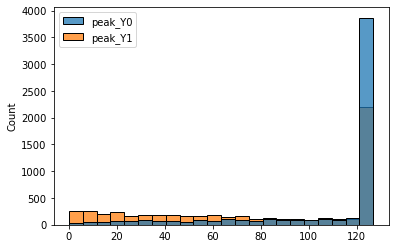

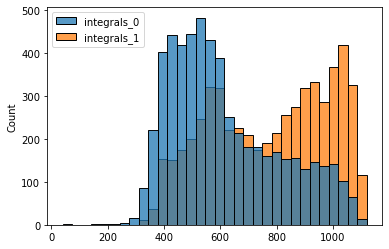

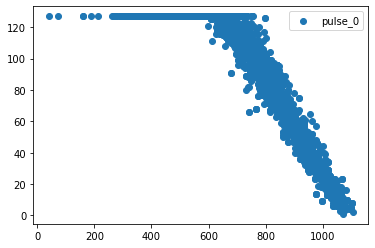

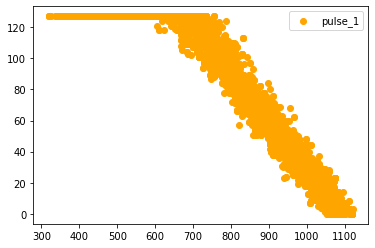

In [87]:
plots_collection(results=results)

4017 events


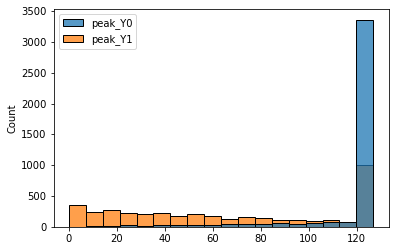

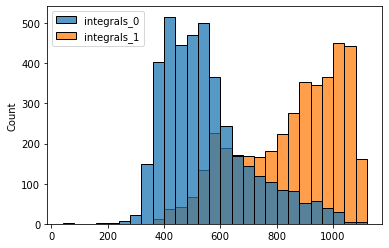

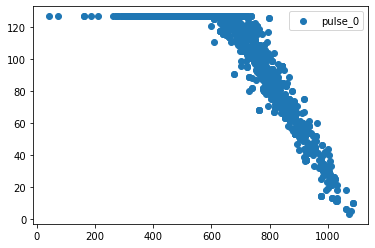

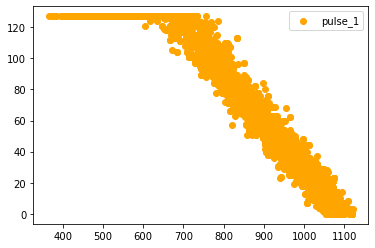

In [88]:
plots_collection(results=results_filt)

726 events


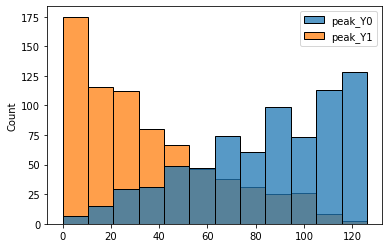

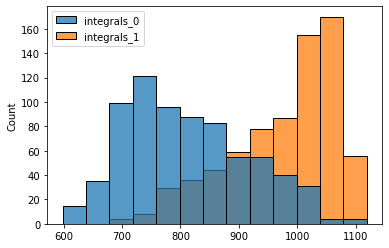

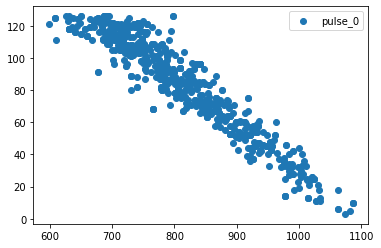

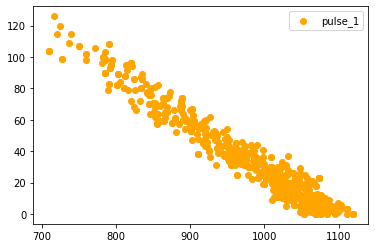

In [89]:
plots_collection(results=results_filt_2)